### Python for Data Analysis Demo

**1. Load the Pythons Packages and Dataset**

- Start by loading the dataset into Pandas and give a quick overview of its structure.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

# airbnb_df = pd.read_csv('archive/players_22.csv')
airbnb_df = pd.read_csv('archive/players_22.csv', low_memory=False)
airbnb_df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


**2. Explore the Data**

- Perform initial data exploration to understand the dataset’s structure and key statistics.

In [ ]:
airbnb_df.shape


(19239, 110)

In [ ]:

airbnb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [ ]:

airbnb_df.columns.to_list()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

**3. Handle Missing Data**

- Demonstrate how to handle missing data by dropping rows with critical missing values.

In [ ]:
airbnb_df.dropna(subset=['value_eur', 'wage_eur', 'club_name'], inplace=True)


In [ ]:

airbnb_df.isnull().sum()


sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url           0
club_flag_url           0
nation_logo_url     18467
nation_flag_url         0
Length: 110, dtype: int64

In [ ]:

airbnb_df.shape

(19165, 110)

**4. Analyze the Data**

- Use data analysis techniques (sorting, grouping, and descriptive statistics) to uncover insights about the players.

4.1 Top 10 Most Valuable Players

In [ ]:
top_valuable_players = airbnb_df.sort_values(by='value_eur', ascending=False).head(10)
top_valuable_players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
29,239085,https://sofifa.com/player/239085/erling-haalan...,E. Haaland,Erling Braut Haaland,ST,88,93,137500000.0,110000.0,20,...,60+3,60+3,60+3,60+3,19+3,https://cdn.sofifa.net/players/239/085/22_120.png,https://cdn.sofifa.net/teams/22/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1352/60.png,https://cdn.sofifa.net/flags/no.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
43,228702,https://sofifa.com/player/228702/frenkie-de-jo...,F. de Jong,Frenkie de Jong,"CM, CDM, CB",87,92,119500000.0,210000.0,24,...,78+3,78+3,78+3,82+3,18+3,https://cdn.sofifa.net/players/228/702/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
21,230621,https://sofifa.com/player/230621/gianluigi-don...,G. Donnarumma,Gianluigi Donnarumma,GK,89,93,119500000.0,110000.0,22,...,31+3,31+3,31+3,31+3,87+3,https://cdn.sofifa.net/players/230/621/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1343/60.png,https://cdn.sofifa.net/flags/it.png
45,233049,https://sofifa.com/player/233049/jadon-sancho/...,J. Sancho,Jadon Sancho,"RM, CF, LM",87,91,116500000.0,150000.0,21,...,48+3,48+3,48+3,60+3,19+3,https://cdn.sofifa.net/players/233/049/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png
44,231281,https://sofifa.com/player/231281/trent-alexand...,T. Alexander-Arnold,Trent Alexander-Arnold,RB,87,92,114000000.0,150000.0,22,...,78+3,78+3,78+3,83+3,19+3,https://cdn.sofifa.net/players/231/281/22_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


In [10]:

top_valuable_players[['short_name', 'club_name', 'value_eur']]

,short_name,club_name,value_eur
6,K. Mbappé,Paris Saint-Germain,194000000.0
29,E. Haaland,Borussia Dortmund,137500000.0
9,H. Kane,Tottenham Hotspur,129500000.0
3,Neymar Jr,Paris Saint-Germain,129000000.0
4,K. De Bruyne,Manchester City,125500000.0
1,R. Lewandowski,FC Bayern München,119500000.0
43,F. de Jong,FC Barcelona,119500000.0
21,G. Donnarumma,Paris Saint-Germain,119500000.0
45,J. Sancho,Manchester United,116500000.0
44,T. Alexander-Arnold,Liverpool,114000000.0


4.2 Distribution of Player Ratings

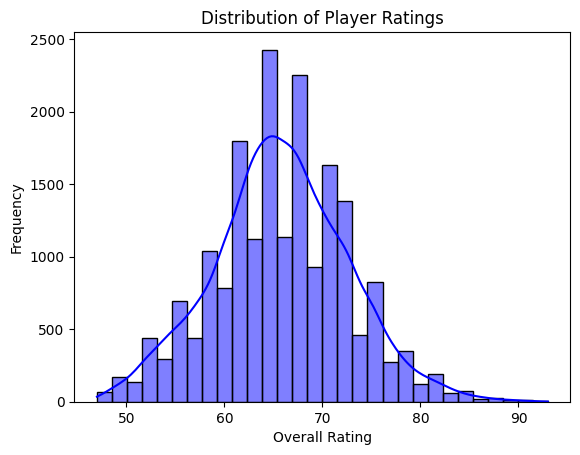

In [ ]:
sns.histplot(airbnb_df['overall'], kde=True, bins=30, color='blue')
plt.title('Distribution of Player Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

4.3 Compare Player Ages Across Ratings

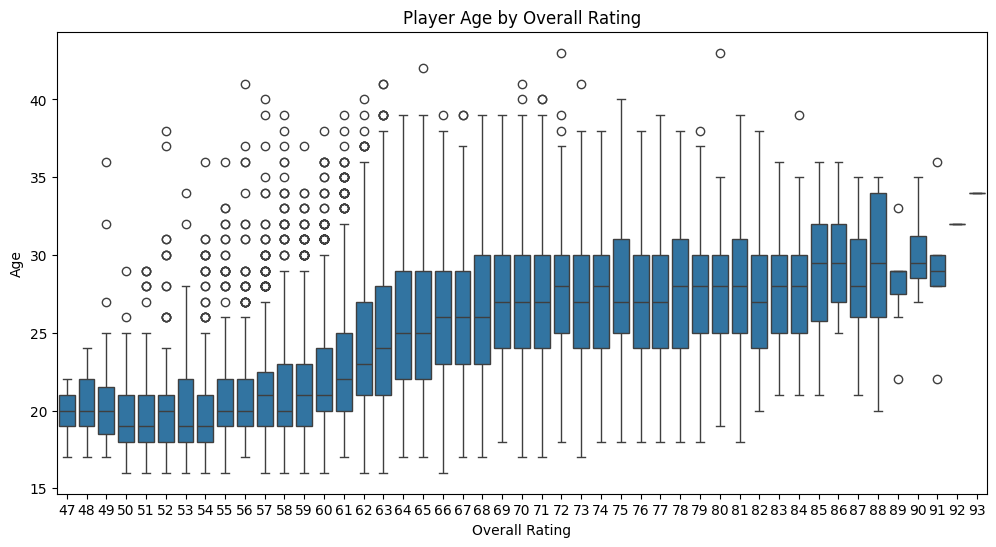

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='overall', y='age', data=airbnb_df)
plt.title('Player Age by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Age')
plt.show()

4.4 Average Player Rating by Nationality

/var/folders/bs/zn7hxrnj0fx87gcf7r0jdfww0000gn/T/ipykernel_18725/674342496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nationality_ratings.values, y=nationality_ratings.index, palette='viridis')


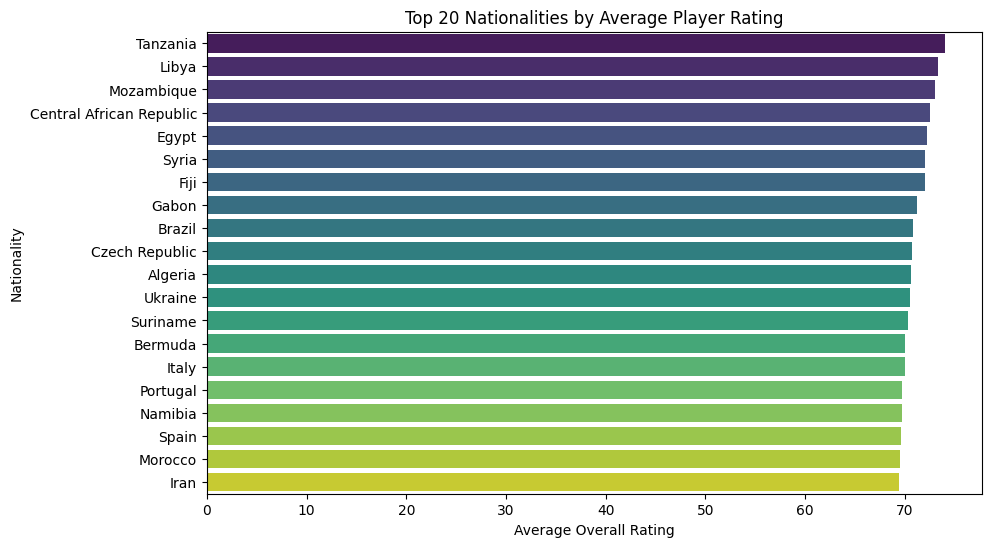

In [ ]:
nationality_ratings = airbnb_df.groupby('nationality_name')['overall'].mean().sort_values(ascending=False).head(20)
nationality_ratings

plt.figure(figsize=(10, 6))
sns.barplot(x=nationality_ratings.values, y=nationality_ratings.index, palette='viridis')
plt.title('Top 20 Nationalities by Average Player Rating')
plt.xlabel('Average Overall Rating')
plt.ylabel('Nationality')
plt.show()

**5. Advanced Insights**

- Dive deeper into specific trends and relationships in the data, such as correlations between wages, value, and player ratings.

5.1 Wage vs. Value Correlation

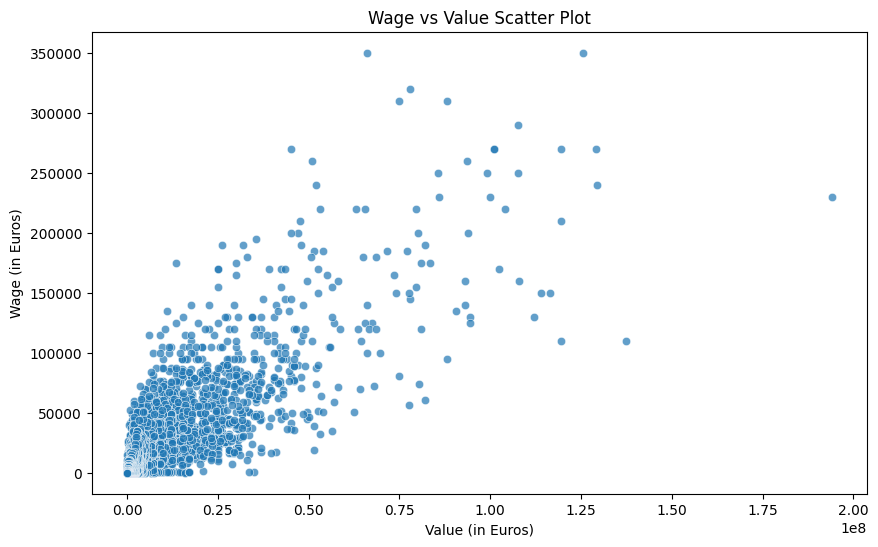

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value_eur', y='wage_eur', data=airbnb_df, alpha=0.7)
plt.title('Wage vs Value Scatter Plot')
plt.xlabel('Value (in Euros)')
plt.ylabel('Wage (in Euros)')
plt.show()

5.2 Potential vs. Overall Ratings

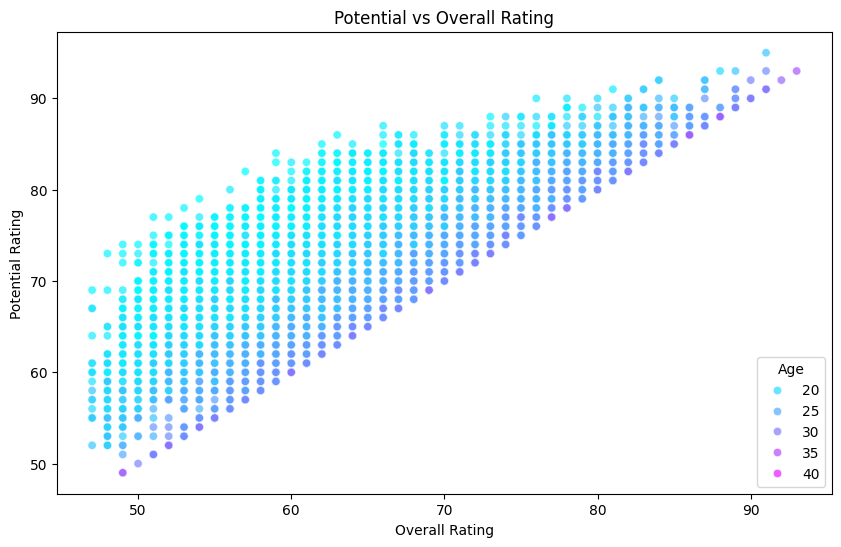

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall', y='potential', data=airbnb_df, hue='age', palette='cool', alpha=0.7)
plt.title('Potential vs Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.legend(title='Age', loc='lower right')
plt.show()

5.3 Most Common Player Positions

/var/folders/bs/zn7hxrnj0fx87gcf7r0jdfww0000gn/T/ipykernel_18725/2697519024.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.values, y=position_counts.index, palette='mako')


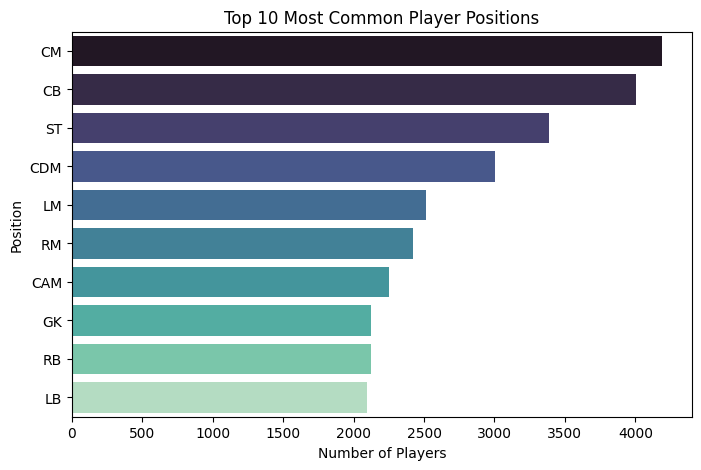

In [ ]:
airbnb_df['player_positions'] = airbnb_df['player_positions'].str.split(', ')
positions_exploded = airbnb_df.explode('player_positions')

position_counts = positions_exploded['player_positions'].value_counts().head(10)
position_counts

plt.figure(figsize=(8, 5))
sns.barplot(x=position_counts.values, y=position_counts.index, palette='mako')
plt.title('Top 10 Most Common Player Positions')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.show()

**6. Grouped Analysis**

- Examine group-based trends, such as average ratings by club.

/var/folders/bs/zn7hxrnj0fx87gcf7r0jdfww0000gn/T/ipykernel_18725/2593209074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='plasma')


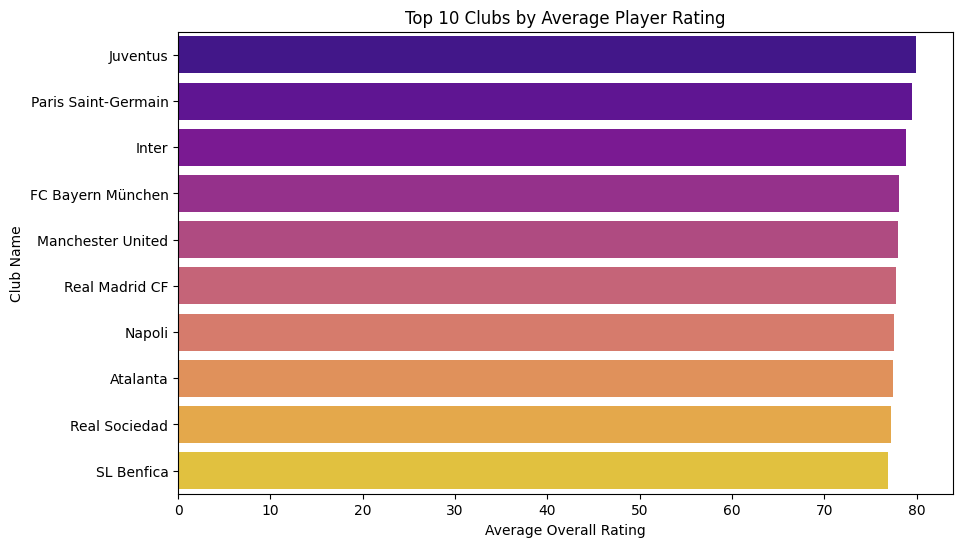

In [ ]:
top_clubs = airbnb_df.groupby('club_name')['overall'].mean().sort_values(ascending=False).head(10)
top_clubs

plt.figure(figsize=(10, 6))
sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='plasma')
plt.title('Top 10 Clubs by Average Player Rating')
plt.xlabel('Average Overall Rating')
plt.ylabel('Club Name')
plt.show()